In [69]:
# Import dependencies
import pandas as pd
import numpy as np
import datetime
from astral import moon

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import hvplot.pandas
import plotly.express as px
import matplotlib.pyplot as plt


In [2]:
# Read in the 2 different dataframes to be used
moon_df = pd.read_csv('Resources/full_moon.csv')
birth_df = pd.read_csv('Resources/US_births_2000-2014_SSA.csv')

In [3]:
moon_df.head()

,Day,Date,Time
0,Monday,15 January 1900,08:07:30 pm
1,Wednesday,14 February 1900,02:50:12 pm
2,Friday,16 March 1900,09:11:48 am
3,Sunday,15 April 1900,02:02:06 am
4,Monday,14 May 1900,04:36:36 pm


In [4]:
# Double check no typos
moon_df.columns

Index(['Day', 'Date', 'Time'], dtype='object')

In [5]:
# Drop unnecessary column
moon_df.drop("Time",axis=1,inplace=True)

In [6]:
moon_df.head()

,Day,Date
0,Monday,15 January 1900
1,Wednesday,14 February 1900
2,Friday,16 March 1900
3,Sunday,15 April 1900
4,Monday,14 May 1900


In [7]:
# Split the 'Date' column into Day, Month, Year
moon_df[['A', 'b', 'C']] = moon_df['Date'].str.split(expand=True)

# Set the numerical columns to 'int' types
moon_df['C'] = moon_df['C'].astype(int)
moon_df['A'] = moon_df['A'].astype(int)

In [8]:
moon_df.dtypes

Day     object
Date    object
A        int32
b       object
C        int32
dtype: object

In [9]:
# Clean the data by dropping dates earlier/later than the 2000-2014 timeframe we want to focus on
moon_df.drop(moon_df[moon_df['C']<2000].index, inplace=True)

moon_df.drop(moon_df[moon_df['C']>2014].index, inplace=True)

In [10]:
moon_df.tail()

,Day,Date,A,b,C
1417,Sunday,10 August 2014,10,August,2014
1418,Tuesday,9 September 2014,9,September,2014
1419,Wednesday,8 October 2014,8,October,2014
1420,Thursday,6 November 2014,6,November,2014
1421,Saturday,6 December 2014,6,December,2014


In [11]:
# Reset the index so indices don't range from 1237-1421
moon_df = moon_df.reset_index()

In [12]:
# Drop the column containing the old index values
moon_df = moon_df.drop('index', axis=1)

In [13]:
# Switch the 'Date' column to a datetime type
moon_df['Date'] = pd.to_datetime(moon_df['Date'])

In [14]:
# Verify it's in the proper format and datatype
print(moon_df['Date'][0])

moon_df.dtypes

2000-01-21 00:00:00


Day             object
Date    datetime64[ns]
A                int32
b               object
C                int32
dtype: object

In [15]:
# Make a 'Full Moon' column for later visualization. Set value to '1'
moon_df['Full Moon'] = 1

In [16]:
moon_df.head()

,Day,Date,A,b,C,Full Moon
0,Friday,2000-01-21,21,January,2000,1
1,Saturday,2000-02-19,19,February,2000,1
2,Monday,2000-03-20,20,March,2000,1
3,Tuesday,2000-04-18,18,April,2000,1
4,Thursday,2000-05-18,18,May,2000,1


In [17]:
birth_df = birth_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [18]:
birth_df['date'] = pd.to_datetime(birth_df['date'])
birth_df['date'] = pd.to_datetime(birth_df['date'], format='%Y%m%d').dt.date
birth_df.head()

,year,month,date_of_month,day_of_week,births,date
0,2000.0,1.0,1.0,6.0,9083.0,2000-01-01
1,2000.0,1.0,2.0,7.0,8006.0,2000-01-02
2,2000.0,1.0,3.0,1.0,11363.0,2000-01-03
3,2000.0,1.0,4.0,2.0,13032.0,2000-01-04
4,2000.0,1.0,5.0,3.0,12558.0,2000-01-05


In [19]:
print(birth_df['date'][0])

y=birth_df['date'][0]

2000-01-01


In [20]:
# Initialize a column called 'phase' with a float decimal
birth_df['phase'] = 0.01

In [21]:
# Loop through the dataframe with iteritems
# For the current row in the for loop, set the 'phase' column's value to the output from the moon.phase method for that row's date
for index, row in birth_df['date'].iteritems():
    birth_df['phase'][index] = moon.phase(birth_df['date'][index])
    
# Need to drop the null values before doing this?
# Currently this cell gives an error, though the error can be ignored and the rest of the code can be ran successfully

C:\Users\Ian\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
# Check that the 'phase' column was created successfully
birth_df.head(10)
birth_df.tail()

,year,month,date_of_month,day_of_week,births,date,phase
5474,2014.0,12.0,27.0,6.0,8656.0,2014-12-27,5.711222
5475,2014.0,12.0,28.0,7.0,7724.0,2014-12-28,6.722333
5476,2014.0,12.0,29.0,1.0,12811.0,2014-12-29,7.733444
5477,2014.0,12.0,30.0,2.0,13634.0,2014-12-30,8.666778
5478,2014.0,12.0,31.0,3.0,11990.0,2014-12-31,9.677889


In [23]:
# Revert the 'date' column back to datetime type including seconds for merging
birth_df['date'] = pd.to_datetime(birth_df['date'])

In [24]:
# Verify type change
birth_df.dtypes

year                    float64
month                   float64
date_of_month           float64
day_of_week             float64
births                  float64
date             datetime64[ns]
phase                   float64
dtype: object

In [25]:
# Create a merged dataframe
df = pd.merge(birth_df,moon_df, how='left',left_on='date', right_on='Date')

In [26]:
# View df with enough rows to make sure moon_df merged correctly
df.head(21)

,year,month,date_of_month,day_of_week,births,date,phase,Day,Date,A,b,C,Full Moon
0,2000.0,1.0,1.0,6.0,9083.0,2000-01-01,23.677889,NaN,NaT,NaN,NaN,NaN,NaN
1,2000.0,1.0,2.0,7.0,8006.0,2000-01-02,24.533444,NaN,NaT,NaN,NaN,NaN,NaN
2,2000.0,1.0,3.0,1.0,11363.0,2000-01-03,25.311222,NaN,NaT,NaN,NaN,NaN,NaN
3,2000.0,1.0,4.0,2.0,13032.0,2000-01-04,26.166778,NaN,NaT,NaN,NaN,NaN,NaN
4,2000.0,1.0,5.0,3.0,12558.0,2000-01-05,27.022333,NaN,NaT,NaN,NaN,NaN,NaN
5,2000.0,1.0,6.0,4.0,12466.0,2000-01-06,27.877889,NaN,NaT,NaN,NaN,NaN,NaN
6,2000.0,1.0,7.0,5.0,12516.0,2000-01-07,0.655667,NaN,NaT,NaN,NaN,NaN,NaN
7,2000.0,1.0,8.0,6.0,8934.0,2000-01-08,1.511222,NaN,NaT,NaN,NaN,NaN,NaN
8,2000.0,1.0,9.0,7.0,7949.0,2000-01-09,2.444556,NaN,NaT,NaN,NaN,NaN,NaN
9,2000.0,1.0,10.0,1.0,11668.0,2000-01-10,3.300111,NaN,NaT,NaN,NaN,NaN,NaN


In [27]:
# Drop redundant columns (may want to keep 'date' instead of 'year','month','date_of_month')
df.drop(['Date','date','A','b','C'], axis=1, inplace=True)

df.head(21)

,year,month,date_of_month,day_of_week,births,phase,Day,Full Moon
0,2000.0,1.0,1.0,6.0,9083.0,23.677889,NaN,NaN
1,2000.0,1.0,2.0,7.0,8006.0,24.533444,NaN,NaN
2,2000.0,1.0,3.0,1.0,11363.0,25.311222,NaN,NaN
3,2000.0,1.0,4.0,2.0,13032.0,26.166778,NaN,NaN
4,2000.0,1.0,5.0,3.0,12558.0,27.022333,NaN,NaN
5,2000.0,1.0,6.0,4.0,12466.0,27.877889,NaN,NaN
6,2000.0,1.0,7.0,5.0,12516.0,0.655667,NaN,NaN
7,2000.0,1.0,8.0,6.0,8934.0,1.511222,NaN,NaN
8,2000.0,1.0,9.0,7.0,7949.0,2.444556,NaN,NaN
9,2000.0,1.0,10.0,1.0,11668.0,3.300111,NaN,NaN


In [28]:
# Fill in the 'Full Moon' values that are currently null (i.e. dates which were not present in moon_df)
df['Full Moon'].fillna(value=0, inplace=True)

df.head(21)

,year,month,date_of_month,day_of_week,births,phase,Day,Full Moon
0,2000.0,1.0,1.0,6.0,9083.0,23.677889,NaN,0.0
1,2000.0,1.0,2.0,7.0,8006.0,24.533444,NaN,0.0
2,2000.0,1.0,3.0,1.0,11363.0,25.311222,NaN,0.0
3,2000.0,1.0,4.0,2.0,13032.0,26.166778,NaN,0.0
4,2000.0,1.0,5.0,3.0,12558.0,27.022333,NaN,0.0
5,2000.0,1.0,6.0,4.0,12466.0,27.877889,NaN,0.0
6,2000.0,1.0,7.0,5.0,12516.0,0.655667,NaN,0.0
7,2000.0,1.0,8.0,6.0,8934.0,1.511222,NaN,0.0
8,2000.0,1.0,9.0,7.0,7949.0,2.444556,NaN,0.0
9,2000.0,1.0,10.0,1.0,11668.0,3.300111,NaN,0.0


In [29]:
# Fill in days of the week for dates that weren't in moon_df

df['Day'].loc[df['day_of_week'] == 1] = 'Monday'
df['Day'].loc[df['day_of_week'] == 2] = 'Tuesday'
df['Day'].loc[df['day_of_week'] == 3] = 'Wednesday'
df['Day'].loc[df['day_of_week'] == 4] = 'Thursday'
df['Day'].loc[df['day_of_week'] == 5] = 'Friday'
df['Day'].loc[df['day_of_week'] == 6] = 'Saturday'
df['Day'].loc[df['day_of_week'] == 7] = 'Sunday'


df.head(10)

C:\Users\Ian\anaconda3\envs\ml\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,year,month,date_of_month,day_of_week,births,phase,Day,Full Moon
0,2000.0,1.0,1.0,6.0,9083.0,23.677889,Saturday,0.0
1,2000.0,1.0,2.0,7.0,8006.0,24.533444,Sunday,0.0
2,2000.0,1.0,3.0,1.0,11363.0,25.311222,Monday,0.0
3,2000.0,1.0,4.0,2.0,13032.0,26.166778,Tuesday,0.0
4,2000.0,1.0,5.0,3.0,12558.0,27.022333,Wednesday,0.0
5,2000.0,1.0,6.0,4.0,12466.0,27.877889,Thursday,0.0
6,2000.0,1.0,7.0,5.0,12516.0,0.655667,Friday,0.0
7,2000.0,1.0,8.0,6.0,8934.0,1.511222,Saturday,0.0
8,2000.0,1.0,9.0,7.0,7949.0,2.444556,Sunday,0.0
9,2000.0,1.0,10.0,1.0,11668.0,3.300111,Monday,0.0


In [30]:
# Create a 'Lunar Effect' column to display whether a date is with +- 7 days of the full moon
df['Lunar_Effect'] = 0

df.head(21)

,year,month,date_of_month,day_of_week,births,phase,Day,Full Moon,Lunar_Effect
0,2000.0,1.0,1.0,6.0,9083.0,23.677889,Saturday,0.0,0
1,2000.0,1.0,2.0,7.0,8006.0,24.533444,Sunday,0.0,0
2,2000.0,1.0,3.0,1.0,11363.0,25.311222,Monday,0.0,0
3,2000.0,1.0,4.0,2.0,13032.0,26.166778,Tuesday,0.0,0
4,2000.0,1.0,5.0,3.0,12558.0,27.022333,Wednesday,0.0,0
5,2000.0,1.0,6.0,4.0,12466.0,27.877889,Thursday,0.0,0
6,2000.0,1.0,7.0,5.0,12516.0,0.655667,Friday,0.0,0
7,2000.0,1.0,8.0,6.0,8934.0,1.511222,Saturday,0.0,0
8,2000.0,1.0,9.0,7.0,7949.0,2.444556,Sunday,0.0,0
9,2000.0,1.0,10.0,1.0,11668.0,3.300111,Monday,0.0,0


In [31]:
df.tail()

,year,month,date_of_month,day_of_week,births,phase,Day,Full Moon,Lunar_Effect
5474,2014.0,12.0,27.0,6.0,8656.0,5.711222,Saturday,0.0,0
5475,2014.0,12.0,28.0,7.0,7724.0,6.722333,Sunday,0.0,0
5476,2014.0,12.0,29.0,1.0,12811.0,7.733444,Monday,0.0,0
5477,2014.0,12.0,30.0,2.0,13634.0,8.666778,Tuesday,0.0,0
5478,2014.0,12.0,31.0,3.0,11990.0,9.677889,Wednesday,0.0,0


In [32]:
# Locate the rows where 'phase' is between 7 and 21 (i.e. within +- 7 days of the full moon). Change their 'Lunar_Effect' value to 1.
df['Lunar_Effect'].loc[df['phase']<21] = 1

C:\Users\Ian\anaconda3\envs\ml\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [33]:
df['Lunar_Effect'].loc[df['phase']<7] = 0

In [34]:
df.head(15)

,year,month,date_of_month,day_of_week,births,phase,Day,Full Moon,Lunar_Effect
0,2000.0,1.0,1.0,6.0,9083.0,23.677889,Saturday,0.0,0
1,2000.0,1.0,2.0,7.0,8006.0,24.533444,Sunday,0.0,0
2,2000.0,1.0,3.0,1.0,11363.0,25.311222,Monday,0.0,0
3,2000.0,1.0,4.0,2.0,13032.0,26.166778,Tuesday,0.0,0
4,2000.0,1.0,5.0,3.0,12558.0,27.022333,Wednesday,0.0,0
5,2000.0,1.0,6.0,4.0,12466.0,27.877889,Thursday,0.0,0
6,2000.0,1.0,7.0,5.0,12516.0,0.655667,Friday,0.0,0
7,2000.0,1.0,8.0,6.0,8934.0,1.511222,Saturday,0.0,0
8,2000.0,1.0,9.0,7.0,7949.0,2.444556,Sunday,0.0,0
9,2000.0,1.0,10.0,1.0,11668.0,3.300111,Monday,0.0,0


MACHINE LEARNING PART

In [35]:
# # Split our preprocessed data into our features and target arrays
# y = df.Lunar_Effect
# X = df.drop(columns=["Lunar_Effect"])

# # Split the preprocessed data into a training and testing dataset
# # Do we need to drop the date related columns + the 'phase' column before fitting a machine learning alg?
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [47]:
data_scaler = StandardScaler()

In [63]:
birth_data_scaled = data_scaler.fit_transform(df.drop(columns=['year','month','date_of_month','day_of_week','phase','Day','Full Moon','Lunar_Effect']))
birth_data_scaled[:5]

array([[-0.97482787],
       [-1.43793241],
       [ 0.00556058],
       [ 0.72322213],
       [ 0.51940453]])

In [64]:
# Split our preprocessed data into our features and target arrays
y = df.day_of_week

## HOW DO WE SCALE THIS???
X = data_scaler.fit_transform(birth_data_scaled)

# Split the preprocessed data into a training and testing dataset
# Do we need to drop the date related columns + the 'phase' column before fitting a machine learning alg?
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

C:\Users\Ian\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [65]:
model = LinearRegression()

In [66]:
model.fit(X_train, y_train)

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.4849343574069166
Testing Score: 0.46888516801579905


In [67]:
y_pred = model.predict(X_test)

print(y_pred.shape)

(1370,)


ValueError: x and y must have same first dimension, but have shapes (5479, 1) and (1370,)

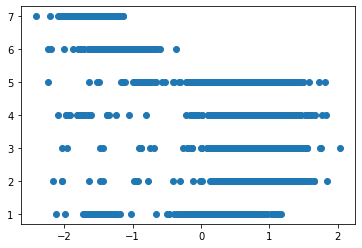

In [70]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [ ]:
# Question 1: Which days of the week are most common (Tuesday --> Monday --> ...?)
    # Use regression to predict which day of the week it is from inputs
    # Independent goal variable = 'day_of_week'
    # Start with only the 'births' as dependent, throw in some other columns if needed
    

# Question 2: Are babies more likely to be born during Lunar phase (+- 7 of full moon)
    # Use K-Means clusters = 2